In [1]:
%matplotlib inline
import pandas as pd

In [2]:
%%sh
ls data

BreadBasket_DMS.csv


In [3]:
df = pd.read_csv('data/BreadBasket_DMS.csv')

In [4]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [5]:
df.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f437e1cb828>]],
      dtype=object)

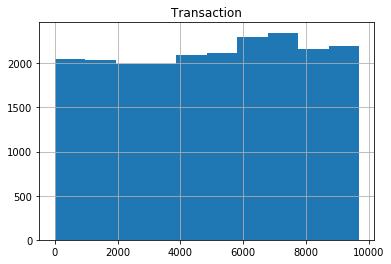

In [6]:
df.hist()

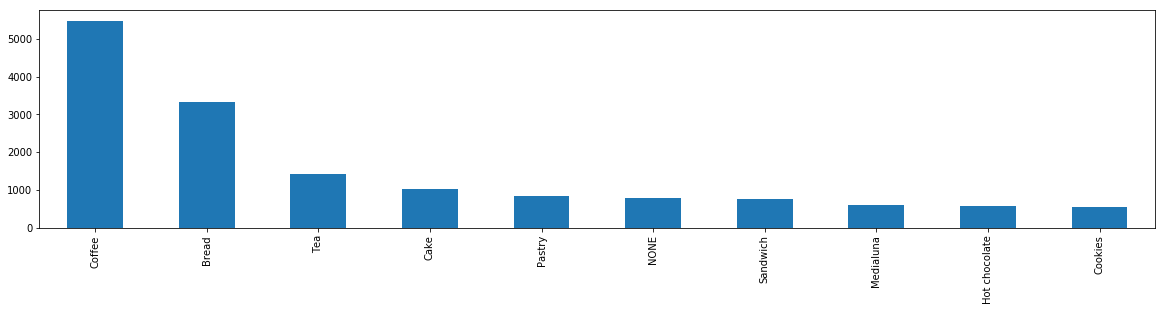

In [26]:
df['Item'].value_counts().head(10).plot(kind='bar',figsize=(20,4) )

In [8]:
x=df.Time

In [9]:
x[0]

'09:58:11'

In [10]:
from pytz import datetime


In [11]:
x=datetime.datetime.now()

In [12]:
y=datetime.datetime.now()

In [13]:
type(y-x)

datetime.timedelta

In [14]:
type(x)

datetime.datetime

In [15]:
datetime.datetime.strptime('2019-2-14','%Y-%m-%d')

datetime.datetime(2019, 2, 14, 0, 0)

In [16]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [17]:
df['datetime']=pd.to_datetime(df.Date+' '+df.Time, format='%Y-%m-%d %H:%M:%S')

In [18]:
df.head()

,Date,Time,Transaction,Item,datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [19]:
df['hours']=df.datetime.apply(lambda x: x.hour)

In [20]:
df.head()

,Date,Time,Transaction,Item,datetime,hours
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,9
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,10
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,10
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,10


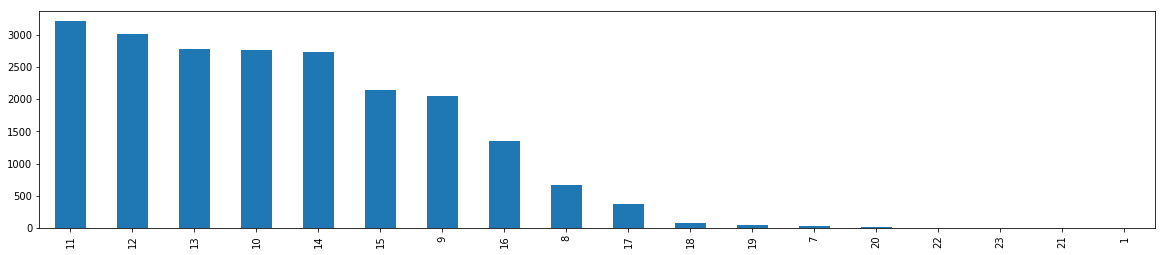

In [21]:
df['hours'].value_counts().plot(kind='bar',figsize=(20,4) )

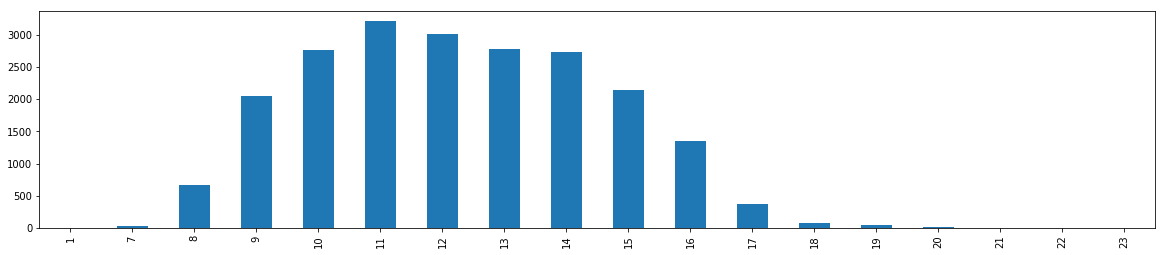

In [25]:
df['hours']\
    .astype('int')\
    .value_counts()\
    .sort_index()\
    .plot(kind='bar',figsize=(20,4) )

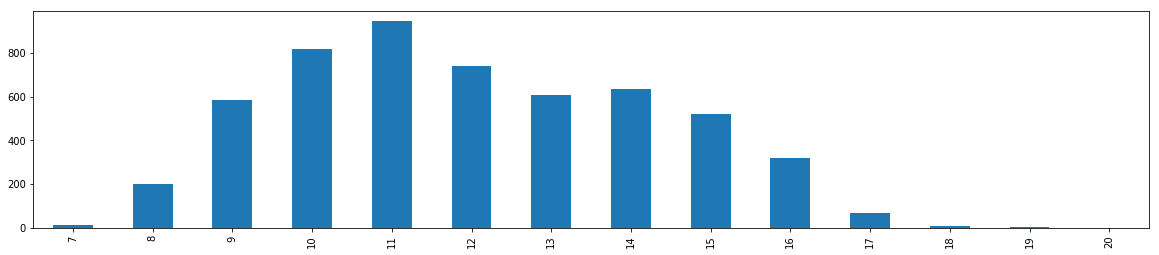

In [27]:
df[df.Item=='Coffee']['hours']\
    .astype('int')\
    .value_counts()\
    .sort_index()\
    .plot(kind='bar',figsize=(20,4) )

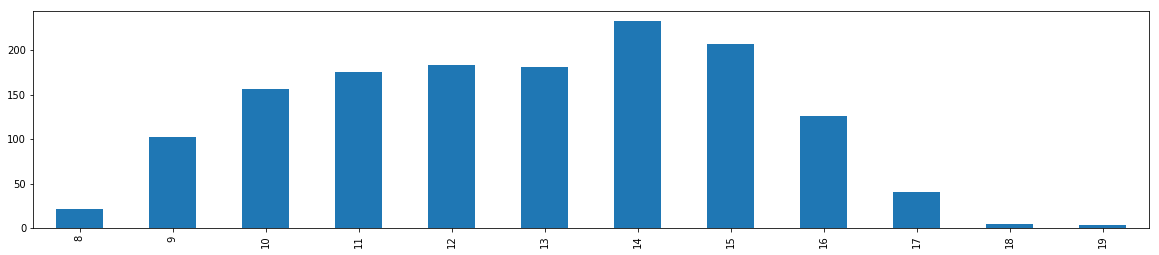

In [28]:
df[df.Item=='Tea']['hours']\
    .astype('int')\
    .value_counts()\
    .sort_index()\
    .plot(kind='bar',figsize=(20,4) )

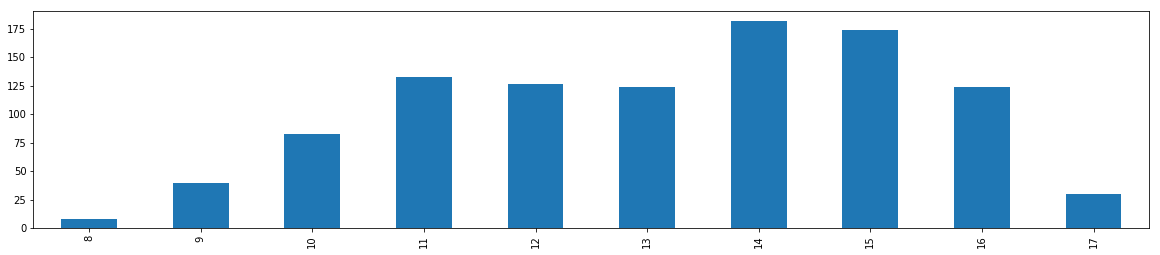

In [30]:
df[df.Item=='Cake']['hours']\
    .astype('int')\
    .value_counts()\
    .sort_index()\
    .plot(kind='bar',figsize=(20,4) )

In [65]:
y=df\
    .groupby(['Transaction','Item'])\
    .agg({
        'Item': ['count'], 
    })
    
y.head(10)

Item
                          count
Transaction Item               
1           Bread             1
2           Scandinavian      2
3           Cookies           1
            Hot chocolate     1
            Jam               1
4           Muffin            1
5           Bread             1
            Coffee            1
            Pastry            1
6           Medialuna         1

In [92]:
z=y.loc[9684]
for i in z.iterrows():
    print(i[0])

Smoothies


In [120]:
d={}
for k in range(1,9684):#9684
    try:
        z=y.loc[k]        
        for i in z.iterrows():
            for j in z.iterrows():
                d[i[0]]=d.get(i[0], {j[0]:0})
                d[i[0]][j[0]]=d[i[0]].get(j[0], 0)+1
                #print(i[0],j[0])
            d[i[0]]['count']=d[i[0]].get('count', 0)+1
    except:
        pass

In [121]:
d['Cookies']['count']

515

In [123]:
def prob(a,b):
    global d
    p=d[a][b]/d[b]['count']
    return p

In [125]:
prob('Cake','Tea')

0.16666666666666666

In [126]:
prob('Tea','Cake')

0.2288911495422177